<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/keras_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [40]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [41]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [32]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [33]:
df.shape

(10000, 11)

In [42]:
df=pd.get_dummies(df,columns=['Geography', 'Gender'],drop_first=True)

In [47]:
df.shape

(10000, 12)

In [44]:
x=df.drop(columns=['Exited'])

In [48]:
y=df['Exited']

In [46]:
x.shape

(10000, 11)

In [49]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [50]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10)

In [52]:
x_train.shape

(8000, 11)

In [53]:
x_test.shape

(2000, 11)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [55]:
x_train_trans=scaler.fit_transform(x_train)
x_test_trans=scaler.fit_transform(x_test)

In [57]:
x_train_trans.shape

(8000, 11)

In [58]:
x_test_trans

array([[ 2.0861168 ,  0.53613401, -0.01294308, ...,  1.70253795,
        -0.57350122, -1.09665089],
       [ 0.93152309,  0.13722478,  0.99560884, ..., -0.58735842,
         1.74367544, -1.09665089],
       [ 0.41143583,  0.63586131, -1.69386296, ..., -0.58735842,
         1.74367544, -1.09665089],
       ...,
       [-0.83677359, -0.46113907, -1.69386296, ..., -0.58735842,
         1.74367544,  0.91186722],
       [-1.47128004,  2.53068015, -1.02149501, ..., -0.58735842,
        -0.57350122, -1.09665089],
       [ 0.05777649, -0.06222984, -0.68531103, ..., -0.58735842,
         1.74367544,  0.91186722]])

In [ ]:
!pip install tensorflow

In [65]:
from tensorflow import keras
from keras.layers import Activation, Dense 
from keras.models import Sequential 

In [67]:
from keras.engine import sequential
model=Sequential()

In [84]:
model.add(Dense(11, activation='relu',input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
 dense_5 (Dense)             (None, 11)                22        
                                                                 
 dense_6 (Dense)             (None, 11)                1

In [86]:
model.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
history=model.fit(x_train_trans, y_train,  epochs=25, validation_split=0.2)

Epoch 1/25
200/200 [==============================] - 1s 4ms/step - loss: 0.3927 - accuracy: 0.8358 - val_loss: 0.3847 - val_accuracy: 0.8388
Epoch 2/25
200/200 [==============================] - 1s 3ms/step - loss: 0.3927 - accuracy: 0.8366 - val_loss: 0.3849 - val_accuracy: 0.8400
Epoch 3/25
200/200 [==============================] - 1s 3ms/step - loss: 0.3921 - accuracy: 0.8370 - val_loss: 0.3852 - val_accuracy: 0.8400
Epoch 4/25
200/200 [==============================] - 1s 3ms/step - loss: 0.3922 - accuracy: 0.8381 - val_loss: 0.3853 - val_accuracy: 0.8406
Epoch 5/25
200/200 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8375 - val_loss: 0.3858 - val_accuracy: 0.8400
Epoch 6/25
200/200 [==============================] - 1s 3ms/step - loss: 0.3918 - accuracy: 0.8372 - val_loss: 0.3851 - val_accuracy: 0.8413
Epoch 7/25
200/200 [==============================] - 1s 3ms/step - loss: 0.3920 - accuracy: 0.8367 - val_loss: 0.3853 - val_accuracy: 0.8406
Epoch 

In [94]:
history.history

{'loss': [0.39273253083229065,
  0.39273175597190857,
  0.39210978150367737,
  0.3921726644039154,
  0.3928323984146118,
  0.3918459713459015,
  0.39198076725006104,
  0.3924890160560608,
  0.3916271924972534,
  0.39193686842918396,
  0.39215949177742004,
  0.39156821370124817,
  0.3912076950073242,
  0.39160677790641785,
  0.391921728849411,
  0.3919599950313568,
  0.3922375738620758,
  0.3917645215988159,
  0.3914567530155182,
  0.39148035645484924,
  0.3914414346218109,
  0.39123570919036865,
  0.39186719059944153,
  0.3910110592842102,
  0.3914754390716553],
 'accuracy': [0.8357812762260437,
  0.8365625143051147,
  0.8370312452316284,
  0.8381249904632568,
  0.8374999761581421,
  0.8371875286102295,
  0.836718738079071,
  0.8374999761581421,
  0.8374999761581421,
  0.8376562595367432,
  0.8357812762260437,
  0.836718738079071,
  0.8359375,
  0.8385937213897705,
  0.8378124833106995,
  0.8373437523841858,
  0.8370312452316284,
  0.8373437523841858,
  0.8373437523841858,
  0.83906251

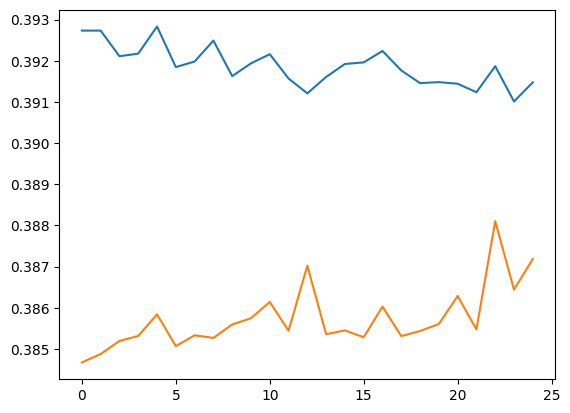

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

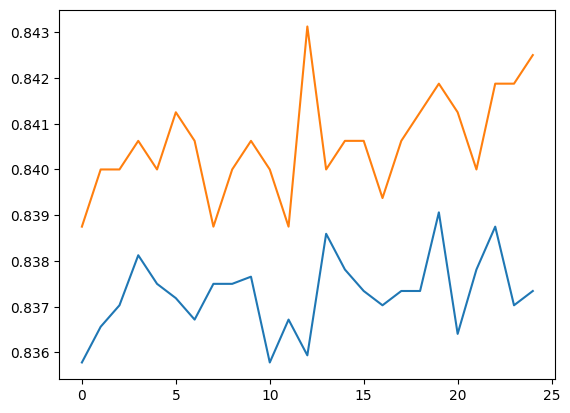

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [88]:
model.layers[0].get_weights()

[array([[-6.54375227e-03,  1.23757333e-01, -3.08447070e-02],
        [ 2.30790591e+00, -2.80028677e+00,  4.80676621e-01],
        [-3.55877401e-03,  2.11620610e-03,  6.33734390e-02],
        [ 7.36003757e-01,  4.26945865e-01, -1.95219725e-01],
        [-1.42010778e-01,  2.06953108e-01, -2.47133803e-02],
        [ 4.48586009e-02, -1.95508495e-01,  2.83950210e-01],
        [ 2.06685945e-01, -1.11144853e+00,  1.58975315e+00],
        [-3.90737653e-02,  5.14087006e-02, -1.81012556e-01],
        [ 7.90434897e-01, -9.42715704e-02, -4.18840855e-01],
        [-8.87503698e-02, -2.29354724e-01,  1.78688169e-01],
        [-7.70794630e-01, -1.01417474e-01,  3.51056099e-01]], dtype=float32),
 array([ 0.74710035,  0.6506343 , -0.74560547], dtype=float32)]

In [89]:
y_log=model.predict(x_test_trans)

63/63 [==============================] - 0s 2ms/step


In [90]:
y_pred=np.where(y_log >0.5,1,0)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.831